# Notebook de preparação, treinamento, testes e visualizações
# FAKE NEWS DETECTION

In [10]:
import pandas as pd

### Recuperando a partir do arquivo os dados

In [11]:
df_completo = pd.read_csv('fake_news_fakebrcorpus.csv', sep=';', encoding='utf-8')

### Obtendo uma amostra dos dados

In [12]:
df_completo.head(3)

,Unnamed: 0,texto normalizado,fake,author,link,category,number of tokens,number of types,number of links inside the news,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity
0,0,O Podemos decidiu expulsar o deputado federal...,0,Naira Trindade,http://politica.estadao.com.br/blogs/coluna-do...,politica,168,107,None,24,2,43,5,4,3,7,0.000000,0.134328,0.722973
1,1,"Bolsonaro é um liberal completo, diz president...",0,Marco Rodrigo Almeida,http://www1.folha.uol.com.br/poder/2018/01/194...,politica,1028,474,None,135,2,237,56,45,14,63,0.001156,0.271505,0.547977
2,2,Ministro do STF libera Andrea Neves de prisão ...,0,"Fernando Zuba , Pedro Ângelo E Renan Ramalho",https://g1.globo.com/mg/minas-gerais/noticia/s...,politica,540,232,None,69,0,146,10,20,7,19,0.000000,0.139535,0.487395


### Obtendo informações sobre os campos, seus tipos e as quantidades de dados

In [13]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 19 columns):
Unnamed: 0                                        7200 non-null int64
texto normalizado                                 7200 non-null object
fake                                              7200 non-null int64
author                                            7174 non-null object
link                                              7200 non-null object
category                                          7200 non-null object
number of tokens                                  7200 non-null int64
number of types                                   7200 non-null int64
number of links inside the news                   7200 non-null object
number of verbs                                   7200 non-null int64
number of subjuntive and imperative verbs         7200 non-null int64
number of nouns                                   7200 non-null int64
number of adjectives                            

### Obtendo os nomes das colunas

In [14]:
features_names = df_completo.columns

### Retirando alguns campos para obter as estatísticas dos dados principais

In [15]:
features_names_filtrado = [feature_n for feature_n in features_names if feature_n not in ['seq','fake','number of types']]

In [19]:
df_completo_filtrado = df_completo[features_names_filtrado]

### Obtendo as estatísticas dos dados

In [20]:
df_completo_filtrado.describe()

,Unnamed: 0,number of tokens,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity
count,7200.000000,7200.000000,7200.00000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,1799.500000,742.763333,100.76750,4.063194,182.920278,33.154444,30.014444,13.869028,38.758056,0.003065,0.209758,0.577903
std,1039.302621,774.155454,108.03151,5.492677,186.507322,39.702327,37.742105,15.303212,51.759915,0.007780,0.070239,0.126475
min,0.000000,11.000000,1.00000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.232210
25%,899.750000,183.000000,26.00000,1.000000,46.000000,7.000000,7.000000,3.000000,8.000000,0.000000,0.162500,0.471088
50%,1799.500000,416.000000,57.00000,2.000000,106.000000,18.000000,15.000000,8.000000,19.000000,0.000579,0.204082,0.577402
75%,2699.250000,1064.250000,141.00000,5.000000,265.000000,45.000000,39.000000,19.000000,49.000000,0.003799,0.251055,0.676276
max,3599.000000,8634.000000,1148.00000,65.000000,2170.000000,532.000000,497.000000,181.000000,720.000000,0.382353,0.750000,1.000000


### Filtrando apenas os dados da categoria política para testes

In [23]:
df_politica = df_completo.loc[df_completo['category']=='politica']

In [29]:
df_politica.shape

(4180, 19)

In [27]:
import seaborn as sns

## Criação de funções para ajudar na análise e no pré-processamento

### Classes para selecionar as colunas tipo texto e numérico para usar no pipeline

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [36]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

def classificar_texto(pipe, X_treino, y_treino,isXGB):
    
    kf = StratifiedKFold(n_splits=5,shuffle=True,random_state = 42)
    all_classes_tests = []
    all_predictions = []
    
    for train_index, test_index in kf.split(X_treino, y_treino):
        treino_kf = X_treino.iloc[train_index]
        classe_treino_kf = y_treino.iloc[train_index]
        teste_kf = X_treino.iloc[test_index]
        classe_teste_kf = y_treino.iloc[test_index]
    
        y_pred = []
        predictions = []
    
        if(isXGB == 1):
            pipe.fit(treino_kf, classe_treino_kf)
            y_pred = pipe.predict(teste_kf)
            predictions = [round(value) for value in y_pred]
        else: 
            pipe.fit(treino_kf, classe_treino_kf)
            predictions = pipe.predict(teste_kf)
        
        for predict in predictions:
            all_predictions.append(predict)
            
        for clas_teste in classe_teste_kf:
            all_classes_tests.append(clas_teste)

    # evaluate predictions
    print ("Accuracy:", accuracy_score(all_classes_tests, all_predictions))
    print ("Precision:", precision_score(all_classes_tests, all_predictions))
    print (classification_report(all_classes_tests, all_predictions))
    print (confusion_matrix(all_classes_tests, all_predictions))
    
    

### Função para exibir um gráfico de pareto contendo as palavras com maior frequência

In [37]:
import nltk
from nltk import tokenize
import matplotlib.pyplot as plt
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):

    token_espaco = tokenize.WhitespaceTokenizer()
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()    

## Análise Exploratória dos Dados - EDA

### Análise do campo number of tokens entre as notícias fake e reais

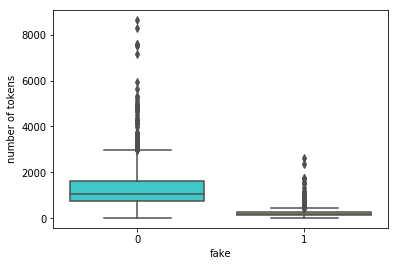

In [28]:
sns.boxplot(x="fake", y="number of tokens", data=df_completo,palette='rainbow')

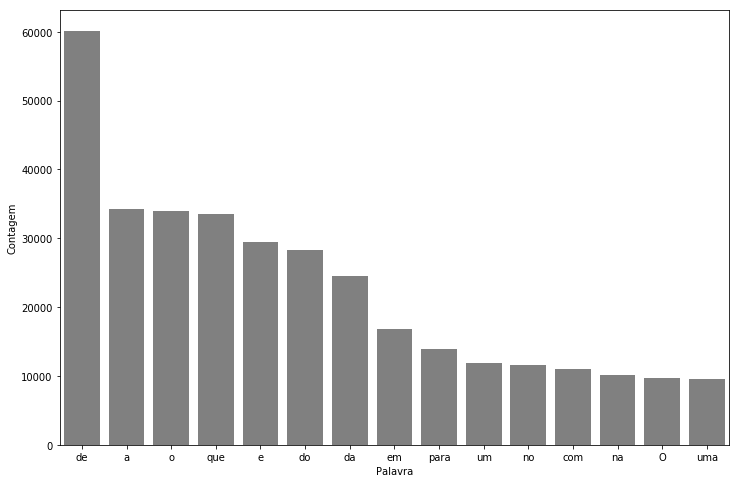

In [38]:
pareto(df_tratado, "texto normalizado", 15)

In [39]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\jp\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [40]:
from nltk import tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from string import punctuation
import unidecode
import re


def limpeza(texto,coluna):
    stop_words_pt = nltk.corpus.stopwords.words("portuguese")
    stemmer = SnowballStemmer("portuguese")
    #stemmer = nltk.RSLPStemmer()
    
    
    token = tokenize.WordPunctTokenizer()

    pontuacao = list()
    for ponto in punctuation:
        pontuacao.append(ponto)

    pontuacao_stopwords = pontuacao + stop_words_pt
    stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

    #Transformando para minusculo, removendo stop words e pontuacao e realizando stemetização    
    
    frase_processada = list()
    for frase in texto[coluna]:
        nova_frase = list()
        ## Tokenizar
        palavras_texto = token.tokenize(frase.lower())
        for palavra in palavras_texto:
            ## Retirar números
            palavra_sem_numero = re.sub('[0-9]', '' , palavra)
            ## Retirar acentuação
            palavra_sem_acento = unidecode.unidecode(palavra_sem_numero)
            ## Retirar stop words
            if ((len(palavra_sem_acento) > 0) and (palavra_sem_acento not in stopwords_sem_acento) and palavra_sem_acento.isalpha()):
                ## Stemização - Obtenção do radical
                palavra_stem = stemmer.stem(palavra_sem_acento)
                ## Retirar as palavras com apenas 1 caracter
                if(len(palavra_stem) > 1):
                    nova_frase.append(palavra_stem)
        frase_processada.append(' '.join(nova_frase))
    
    return frase_processada

In [43]:
import string
def limpeza2(texto,coluna):
    with open('var/stopwords.txt') as f:
        cachedStopWords = f.read()
        stemmer = nltk.stem.SnowballStemmer('portuguese')
        translator = str.maketrans({key:' ' for key in string.punctuation})
    frase_processada = list()
    for frase in texto[coluna]:
        result = ''
        ## Retirar pontuação, os números e transformar em minúscula
        result = re.sub('[0-9]', '' , frase.translate(translator)).lower()
        ## Retirar os stop words e realiza stemização ou obteção do radical
        result = ' '.join([stemmer.stem(word) for word in result.split() if word not in cachedStopWords])
        frase_processada.append(''.join(result))
    return frase_processada

In [44]:
df_politica['texto preprocessado2'] = limpeza2(df_politica,"texto normalizado")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_tratado['texto preprocessado2'] = limpeza2(df_tratado,"texto normalizado")

In [46]:
df_tratado.head()

,seq,texto normalizado,author,link,category,number of tokens,number of types,number of links inside the news,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity,fake,texto preprocessado2
0,1,O Podemos decidiu expulsar o deputado federal...,Naira Trindade\r\n,http://politica.estadao.com.br/blogs/coluna-do...,politica\r\n,168,107,None\r\n,24,2,43,5,4,3,7,0.000000,0.134328,0.722973,0,pod decid expuls deput federal carl gaguim par...
1,2,"Bolsonaro é um liberal completo, diz president...",Marco Rodrigo Almeida\r\n,http://www1.folha.uol.com.br/poder/2018/01/194...,politica\r\n,1028,474,None\r\n,135,2,237,56,45,14,63,0.001156,0.271505,0.547977,0,bolsonar é liberal complet diz president psl p...
2,3,Ministro do STF libera Andrea Neves de prisão ...,"Fernando Zuba , Pedro Ângelo E Renan Ramalho\r\n",https://g1.globo.com/mg/minas-gerais/noticia/s...,politica\r\n,540,232,None\r\n,69,0,146,10,20,7,19,0.000000,0.139535,0.487395,0,ministr stf lib andre nev prisã domicili decis...
3,4,"Apesar da abundância, cresce preocupação com p...","Por Anderson Viegas, G1 MS \r\n",https://g1.globo.com/mato-grosso-do-sul/notici...,politica\r\n,8634,2199,0\r\n,1053,29,2170,443,278,174,384,0.002504,0.223705,0.289800,0,apes abund cresc preocup preserv font uso raci...
4,5,"Por que Harvard e MIT levarão Dilma, Moro e Su...",Por BBC \r\n,https://g1.globo.com/educacao/noticia/por-que-...,politica\r\n,955,452,0\r\n,96,1,262,36,50,8,33,0.000000,0.240223,0.549210,0,harvard mit lev dilm mor suplicy eua megaconfe...


In [47]:
df_tratado['words'] = df_tratado['texto normalizado'].apply(lambda x: len(x.split(' ')))

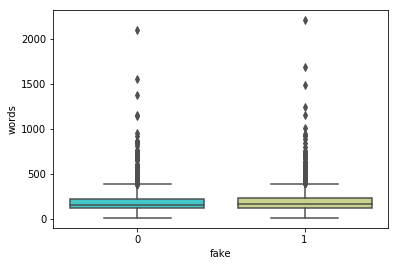

In [48]:
sns.boxplot(x="fake", y="words", data=df_tratado,palette='rainbow')

In [49]:
df_tratado['length'] = df_tratado['texto normalizado'].apply(lambda x: len(x))

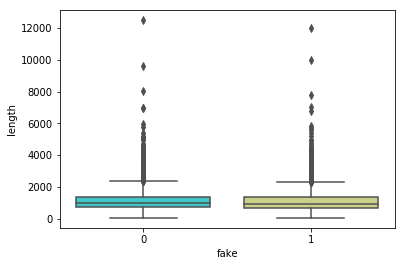

In [50]:
sns.boxplot(x="fake", y="length", data=df_tratado,palette='rainbow')

In [51]:
df_tratado['length2'] = df_tratado['texto preprocessado2'].apply(lambda x: len(x))

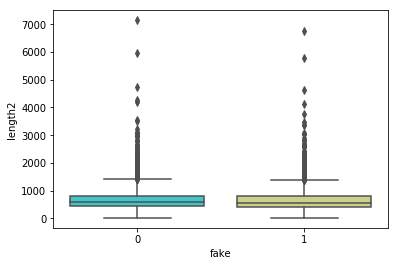

In [52]:
sns.boxplot(x="fake", y="length2", data=df_tratado,palette='rainbow')

In [53]:
df_politica.head()

,seq,texto normalizado,author,link,category,number of tokens,number of types,number of links inside the news,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity,fake,texto preprocessado2
0,1,O Podemos decidiu expulsar o deputado federal...,Naira Trindade\r\n,http://politica.estadao.com.br/blogs/coluna-do...,politica\r\n,168,107,None\r\n,24,2,43,5,4,3,7,0.000000,0.134328,0.722973,0,pod decid expuls deput federal carl gaguim par...
1,2,"Bolsonaro é um liberal completo, diz president...",Marco Rodrigo Almeida\r\n,http://www1.folha.uol.com.br/poder/2018/01/194...,politica\r\n,1028,474,None\r\n,135,2,237,56,45,14,63,0.001156,0.271505,0.547977,0,bolsonar é liberal complet diz president psl p...
2,3,Ministro do STF libera Andrea Neves de prisão ...,"Fernando Zuba , Pedro Ângelo E Renan Ramalho\r\n",https://g1.globo.com/mg/minas-gerais/noticia/s...,politica\r\n,540,232,None\r\n,69,0,146,10,20,7,19,0.000000,0.139535,0.487395,0,ministr stf lib andre nev prisã domicili decis...
3,4,"Apesar da abundância, cresce preocupação com p...","Por Anderson Viegas, G1 MS \r\n",https://g1.globo.com/mato-grosso-do-sul/notici...,politica\r\n,8634,2199,0\r\n,1053,29,2170,443,278,174,384,0.002504,0.223705,0.289800,0,apes abund cresc preocup preserv font uso raci...
4,5,"Por que Harvard e MIT levarão Dilma, Moro e Su...",Por BBC \r\n,https://g1.globo.com/educacao/noticia/por-que-...,politica\r\n,955,452,0\r\n,96,1,262,36,50,8,33,0.000000,0.240223,0.549210,0,harvard mit lev dilm mor suplicy eua megaconfe...


In [54]:
df_politica.tail()

,seq,texto normalizado,author,link,category,number of tokens,number of types,number of links inside the news,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity,fake,texto preprocessado2
7189,7190,Caiu a máscara do Prof. Villa da Jovem Pan. Ví...,None\r\n,https://afolhabrasil.com.br/politica/caiu-masc...,politica\r\n,96,63,0\r\n,11,0,27,1,1,1,2,0.0,0.052632,0.741176,1,caiu másc prof vill jov pan víd mostr professo...
7192,7193,"Deputado e senador pedem para ""abrir mão"" do f...",None\r\n,https://www.diariodobrasil.org/deputado-e-sena...,politica\r\n,187,109,0\r\n,25,0,47,11,5,1,8,0.0,0.222222,0.712418,1,deput senador ped abrir mã for privilegi sã ig...
7195,7196,"FT: ""O julgamento de um populista que usou din...",None\r\n,https://www.diariodobrasil.org/ft-o-julgamento...,politica\r\n,185,101,0\r\n,27,0,46,9,4,4,10,0.0,0.178082,0.619632,1,ft julgament popul usou dinheir públic ajud af...
7196,7197,Nota fiscal emitida pela Petrobras mostra que ...,None\r\n,https://www.diariodobrasil.org/nota-fiscal-emi...,politica\r\n,148,86,1\r\n,19,0,38,9,2,4,2,0.0,0.192982,0.651515,1,not fiscal emit petrobr mostr gasolin é vend b...
7197,7198,"Estão estancando a sangria da ""Lava-Jato"" bem ...",None\r\n,https://www.diariodobrasil.org/estao-estancand...,politica\r\n,313,181,0\r\n,43,2,76,14,8,6,17,0.0,0.184874,0.665441,1,estã estanc sangr lav jat bem debaix nariz lem...


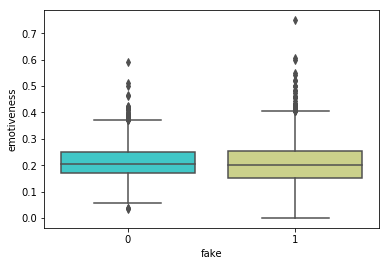

In [55]:
sns.boxplot(x="fake", y="emotiveness", data=df_tratado,palette='rainbow')

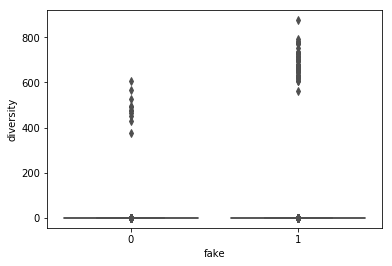

In [56]:
sns.boxplot(x="fake", y="diversity", data=df_tratado,palette='rainbow')

In [57]:
df_politica['number of tokens'] = df_politica['number of tokens'].astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
df_tratado['number of tokens'] = df_tratado['number of tokens'].astype('float')

In [60]:
df_politica['emotiveness'] = df_politica['emotiveness'].astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
df_politica

,seq,texto normalizado,author,link,category,number of tokens,number of types,number of links inside the news,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity,fake,texto preprocessado2
0,1,O Podemos decidiu expulsar o deputado federal...,Naira Trindade\r\n,http://politica.estadao.com.br/blogs/coluna-do...,politica\r\n,168.0,107,None\r\n,24,2,43,5,4,3,7,0.000000,0.134328,0.722973,0,pod decid expuls deput federal carl gaguim par...
1,2,"Bolsonaro é um liberal completo, diz president...",Marco Rodrigo Almeida\r\n,http://www1.folha.uol.com.br/poder/2018/01/194...,politica\r\n,1028.0,474,None\r\n,135,2,237,56,45,14,63,0.001156,0.271505,0.547977,0,bolsonar é liberal complet diz president psl p...
2,3,Ministro do STF libera Andrea Neves de prisão ...,"Fernando Zuba , Pedro Ângelo E Renan Ramalho\r\n",https://g1.globo.com/mg/minas-gerais/noticia/s...,politica\r\n,540.0,232,None\r\n,69,0,146,10,20,7,19,0.000000,0.139535,0.487395,0,ministr stf lib andre nev prisã domicili decis...
3,4,"Apesar da abundância, cresce preocupação com p...","Por Anderson Viegas, G1 MS \r\n",https://g1.globo.com/mato-grosso-do-sul/notici...,politica\r\n,8634.0,2199,0\r\n,1053,29,2170,443,278,174,384,0.002504,0.223705,0.289800,0,apes abund cresc preocup preserv font uso raci...
4,5,"Por que Harvard e MIT levarão Dilma, Moro e Su...",Por BBC \r\n,https://g1.globo.com/educacao/noticia/por-que-...,politica\r\n,955.0,452,0\r\n,96,1,262,36,50,8,33,0.000000,0.240223,0.549210,0,harvard mit lev dilm mor suplicy eua megaconfe...
7,8,As 6 eleições presidenciais que podem mudar ra...,Por BBC \r\n,https://g1.globo.com/politica/noticia/as-6-ele...,politica\r\n,1905.0,742,0\r\n,195,6,479,102,81,31,105,0.002363,0.271513,0.438275,0,eleiçõ presidenc pod mud radical map polít amé...
8,9,Equipamento de Proteção Individual (EPI) x apo...,Por G1 Ribeirão e Franca \r\n,https://g1.globo.com/sp/ribeirao-preto-franca/...,politica\r\n,637.0,256,0\r\n,101,6,139,36,45,11,47,0.000000,0.337500,0.449912,0,equip proteçã individual epi x aposentador esp...
9,10,"Em decisão unânime, tribunal condena Lula em s...","Por Renan Ramalho e Filipe Matoso, G1, Brasíl...",https://g1.globo.com/politica/noticia/julgamen...,politica\r\n,2960.0,945,0\r\n,386,13,774,113,111,52,113,0.000387,0.193103,0.365712,0,decisã unânim tribunal conden lul segund instâ...
11,12,"Quarta-feira, 8 de fevereiro de 2017. Boa noit...",Por G1 \r\n,https://g1.globo.com/resumo-do-dia/noticia/qua...,politica\r\n,683.0,360,None\r\n,85,3,189,28,20,10,28,0.008197,0.175182,0.590164,0,quart feir fevereir boa noit estã princip notí...
13,14,CPI aprova relatório final e recomenda investi...,Jornal Hoje\r\n,https://g1.globo.com/politica/noticia/relatori...,politica\r\n,371.0,193,None\r\n,45,0,104,10,16,3,10,0.018237,0.174497,0.586626,0,cpi aprov relatóri final recomend investig rod...


In [63]:
df_politica['texto preprocessado'] = limpeza(df_politica,"texto normalizado")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
df_politica['texto preprocessado'].head()

0    pod decid expuls deput federal carl gaguim par...
1    bolsonar liberal complet diz president psl par...
2    ministr stf lib andre nev prisa domicili decis...
3    apes abundanc cresc preocupaca preservaca font...
4    harvard mit levara dilm mor suplicy eua megaco...
Name: texto preprocessado, dtype: object

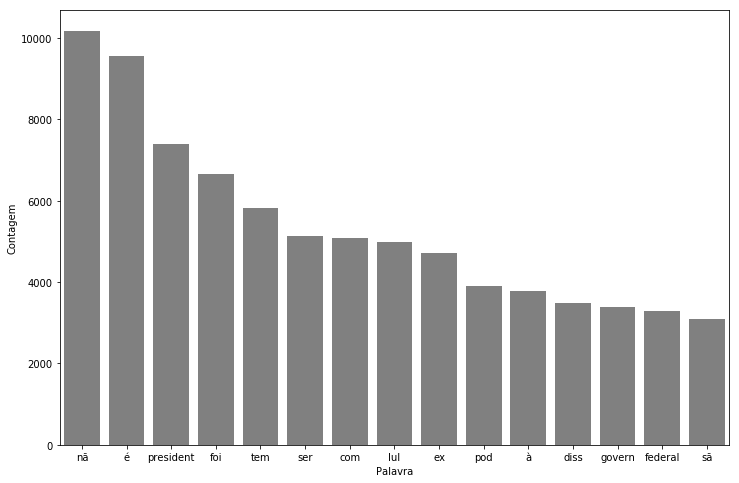

In [65]:
pareto(df_tratado, "texto preprocessado2", 15)

In [ ]:
pareto(df_tratado_real, "texto preprocessado2", 20)

In [100]:
features= [c for c in df_politica.columns.values if c  in ['texto preprocessado2','number of tokens','percentage of news with speeling errors','emotiveness','diversity']]

In [58]:
features

['number of tokens',
 'percentage of news with speeling errors',
 'emotiveness',
 'diversity',
 'texto preprocessado2']

In [71]:
features= [c for c in df_tratado.columns.values if c  in ['texto preprocessado2','emotiveness','diversity']]

In [101]:
treino, teste, classe_treino, classe_teste = train_test_split(df_tratado[features],
                                                              df_tratado['fake'],
                                                              test_size=0.20,
                                                              random_state = 42,shuffle = True, stratify = df_tratado['fake'])


In [95]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
tokens_pipe =  Pipeline([
                ('selector', NumberSelector(key='number of tokens')),
                ('standard', MinMaxScaler())
            ])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
words_pipe =  Pipeline([
                ('selector', NumberSelector(key='words')),
                ('standard', MinMaxScaler())
            ])

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
length_pipe =  Pipeline([
                ('selector', NumberSelector(key='length')),
                ('standard', MinMaxScaler())
            ])

## Teste Regressão Logistica

In [83]:
regressao_logistica = LogisticRegression(solver = "lbfgs")

### Testes com pipeline que incluir texto (CountVectorizer e TFIDFTransform - Unigramas e Bigramas) e features numéricas número de palavras e tamanho da sentença normalizado

In [ ]:
tokens_pipe

In [ ]:
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion([('text', text_pipe), 
                   #   ('words', words_pipe),
                   #   ('length', length_pipe),
                     ])

### Testes com pipeline que incluir texto (CountVectorizer e TFIDFTransform - Unigramas e Bigramas) e feature numérica Emotiveness normalizado

In [75]:
text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer())
            ])

In [76]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
emotiveness_pipe =  Pipeline([
                ('selector', NumberSelector(key='emotiveness')),
                ('standard', MinMaxScaler())
            ])

In [77]:
feats = FeatureUnion([('text', text_pipe),
                     ('emotiveness', emotiveness_pipe)
                     ])
pipe = Pipeline([
    ('features',feats),
    ('classificador', regressao_logistica)
])

NameError: name 'regressao_logistica' is not defined

In [72]:
classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8925347222222222
Precision: 0.8878216123499142
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2880
           1       0.89      0.90      0.89      2880

   micro avg       0.89      0.89      0.89      5760
   macro avg       0.89      0.89      0.89      5760
weighted avg       0.89      0.89      0.89      5760

[[2553  327]
 [ 292 2588]]


### Testes com pipeline que incluir texto (CountVectorizer e TFIDFTransform - Unigramas) e feature numérica Emotiveness normalizado

In [81]:
text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,1))),
                ('tfidf', TfidfTransformer())
            ])

feats = FeatureUnion([('text', text_pipe),
                     ('emotiveness', emotiveness_pipe)
                     ])
pipe = Pipeline([
    ('features',feats),
    ('classificador', regressao_logistica)
])

classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8973958333333333
Precision: 0.9005950297514875
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2880
           1       0.90      0.89      0.90      2880

   micro avg       0.90      0.90      0.90      5760
   macro avg       0.90      0.90      0.90      5760
weighted avg       0.90      0.90      0.90      5760

[[2596  284]
 [ 307 2573]]


### Testes com pipeline que incluir texto (CountVectorizer e TFIDFTransform - Unigramas e Bigramas)

In [84]:
text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer())
            ])

feats = FeatureUnion([('text', text_pipe),
                     ])
pipe = Pipeline([
    ('features',feats),
    ('classificador', regressao_logistica)
])

In [85]:
classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8897569444444444
Precision: 0.8840232637700992
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2880
           1       0.88      0.90      0.89      2880

   micro avg       0.89      0.89      0.89      5760
   macro avg       0.89      0.89      0.89      5760
weighted avg       0.89      0.89      0.89      5760

[[2541  339]
 [ 296 2584]]


### Testes com pipeline que incluir texto (CountVectorizer e TFIDFTransform - Unigramas)

In [86]:
text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,1))),
                ('tfidf', TfidfTransformer())
            ])

feats = FeatureUnion([('text', text_pipe)
                     ])
pipe = Pipeline([
    ('features',feats),
    ('classificador', regressao_logistica)
])

classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8942708333333333
Precision: 0.8955067920585162
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2880
           1       0.90      0.89      0.89      2880

   micro avg       0.89      0.89      0.89      5760
   macro avg       0.89      0.89      0.89      5760
weighted avg       0.89      0.89      0.89      5760

[[2580  300]
 [ 309 2571]]


In [128]:
clf.refit

preds = clf.predict(teste)

In [168]:
print ("Accuracy:", accuracy_score(classe_teste, preds))
print ("Precision:", precision_score(classe_teste, preds))
print (classification_report(classe_teste, preds))
print (confusion_matrix(classe_teste, preds))

Accuracy: 0.8744019138755981
Precision: 0.8883374689826302
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       418
           1       0.89      0.86      0.87       418

   micro avg       0.87      0.87      0.87       836
   macro avg       0.87      0.87      0.87       836
weighted avg       0.87      0.87      0.87       836

[[373  45]
 [ 60 358]]


In [96]:
from sklearn.svm import SVC,LinearSVC
svc = LinearSVC(random_state=0,loss='hinge',max_iter=5000)

In [97]:
text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer())
            ])

feats = FeatureUnion([('text', text_pipe),
                     ('emotiveness', emotiveness_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', svc),
])

Conjunto de dados com todas as categorias de noticias r pipeline incluindo texto e emotiviness

In [88]:
classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.9116319444444444
Precision: 0.9132101777622865
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2880
           1       0.91      0.91      0.91      2880

   micro avg       0.91      0.91      0.91      5760
   macro avg       0.91      0.91      0.91      5760
weighted avg       0.91      0.91      0.91      5760

[[2631  249]
 [ 260 2620]]


In [100]:
svc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=5000, multi_class='ovr',
     penalty='l2', random_state=0, tol=0.0001, verbose=0)

In [101]:
preds = pipe.predict(teste)

In [102]:
print ("Accuracy:", accuracy_score(classe_teste, preds))
print ("Precision:", precision_score(classe_teste, preds))
print (classification_report(classe_teste, preds))
print (confusion_matrix(classe_teste, preds))

Accuracy: 0.9027777777777778
Precision: 0.9050279329608939
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       720
           1       0.91      0.90      0.90       720

   micro avg       0.90      0.90      0.90      1440
   macro avg       0.90      0.90      0.90      1440
weighted avg       0.90      0.90      0.90      1440

[[652  68]
 [ 72 648]]


### Teste Conjunto de dados com todas as categorias de noticias pipeline incluindo texto (unigrama e bigrama) e a feature numérica numéro de tokens

In [98]:
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion([('text', text_pipe), 
                     ('tokens', tokens_pipe),
                   #   ('length', length_pipe),
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', svc)
])

In [102]:
classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.9625
Precision: 0.937007874015748
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2880
           1       0.94      0.99      0.96      2880

   micro avg       0.96      0.96      0.96      5760
   macro avg       0.96      0.96      0.96      5760
weighted avg       0.96      0.96      0.96      5760

[[2688  192]
 [  24 2856]]


### Teste Conjunto de dados com todas as categorias de noticias r pipeline incluindo texto (unigrama e bigrama)

In [68]:
feats = FeatureUnion([('text', text_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', svc),
])

In [69]:
classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.9039930555555555
Precision: 0.9063918966119455
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2880
           1       0.91      0.90      0.90      2880

   micro avg       0.90      0.90      0.90      5760
   macro avg       0.90      0.90      0.90      5760
weighted avg       0.90      0.90      0.90      5760

[[2612  268]
 [ 285 2595]]


In [92]:
preds = pipe.predict(teste)

In [93]:
print ("Accuracy:", accuracy_score(classe_teste, preds))
print ("Precision:", precision_score(classe_teste, preds))
print (classification_report(classe_teste, preds))
print (confusion_matrix(classe_teste, preds))

Accuracy: 0.9027777777777778
Precision: 0.9027777777777778
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       720
           1       0.90      0.90      0.90       720

   micro avg       0.90      0.90      0.90      1440
   macro avg       0.90      0.90      0.90      1440
weighted avg       0.90      0.90      0.90      1440

[[650  70]
 [ 70 650]]


### TEste Conjunto de dados com todas as categorias de noticias r pipeline incluindo texto (unigramas e bigramas) e emotiveness

In [76]:
from xgboost import XGBClassifier
xbc = XGBClassifier(max_depth=4, n_estimators=300, learning_rate=0.1,subsample= 0.5)

feats = FeatureUnion([('text', text_pipe),
                     ('emotiveness', emotiveness_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', xbc)
])


In [77]:
classificar_texto(pipe,treino,classe_treino,1)

KeyboardInterrupt: 

### TEste Conjunto de dados com todas as categorias de noticias r pipeline incluindo texto (unigramas e bigramas)

In [70]:
from xgboost import XGBClassifier
xbc = XGBClassifier(max_depth=4, n_estimators=300, learning_rate=0.1,subsample= 0.5)

feats = FeatureUnion([('text', text_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', xbc)
])


In [71]:
classificar_texto(pipe,treino,classe_treino,1)

Accuracy: 0.8840277777777777
Precision: 0.8829639889196675
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2880
           1       0.88      0.89      0.88      2880

   micro avg       0.88      0.88      0.88      5760
   macro avg       0.88      0.88      0.88      5760
weighted avg       0.88      0.88      0.88      5760

[[2542  338]
 [ 330 2550]]


In [73]:
from sklearn.naive_bayes import MultinomialNB

In [74]:
nb = MultinomialNB()

feats = FeatureUnion([('text', text_pipe),
                     ('emotiveness', emotiveness_pipe)
                     ])
pipe = Pipeline([
    ('features',feats),
    ('classificador', regressao_logistica)
])

pipe = Pipeline([
    ('features',feats),
    ('classificador', nb)
])

In [75]:
classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8657986111111111
Precision: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2880
           1       0.89      0.84      0.86      2880

   micro avg       0.87      0.87      0.87      5760
   macro avg       0.87      0.87      0.87      5760
weighted avg       0.87      0.87      0.87      5760

[[2579  301]
 [ 472 2408]]


## Grid Search CV para otimização do Linear SVC

In [87]:
from sklearn.svm import SVC,LinearSVC
svc = LinearSVC(random_state=0)
feats = FeatureUnion([('text', text_pipe),
                     ('emotiveness', emotiveness_pipe)
                     ])
pipe = Pipeline([
    ('features',feats),
    ('classificador', svc)
])

In [88]:
from sklearn.model_selection import GridSearchCV

hyperparameters = { 'classificador__C':[0.01,1,10,100,1000],
                   'classificador__tol':[0.0001,0.001,0.01],
                   'classificador__loss':['hinge','squared_hinge']                  }
clf = GridSearchCV(pipe, hyperparameters, cv=5)

clf.fit(treino,classe_treino)

print(clf.best_params_)

{'classificador__C': 1, 'classificador__loss': 'hinge', 'classificador__tol': 0.0001}


## Vizualização do Feature Importance

In [93]:
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
#    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([ top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, top_features), feature_names[top_coefficients],rotation=90)
    plt.xlabel('feature')
    plt.ylabel('coeficiente de importancia')
    plt.title('Feature importance')
    plt.show()

In [90]:
cv = text_pipe.get_params()['cv']
print(len(cv.vocabulary_))

320866


In [91]:
features = cv.get_feature_names()
print(cv.get_feature_names()[-20:])

['úte', 'úte entã', 'úte minut', 'úte protocol', 'úte volt', 'úte às', 'úter', 'úter artificial', 'úter cânc', 'úter homens', 'úter permit', 'úter próstat', 'útil', 'útil agrad', 'útil ano', 'útil brasil', 'útil país', 'útil produt', 'útil promotor', 'útil tenh']


In [92]:
features.append('emotiveness')

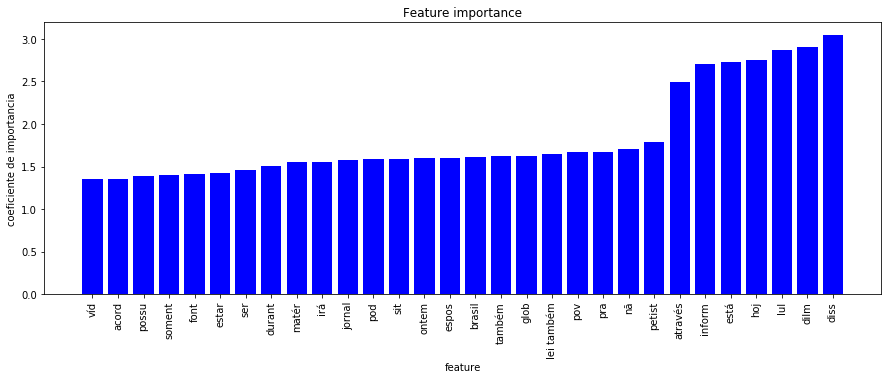

In [94]:
plot_coefficients(svc, features,30)